In [409]:
import sys
sys.path.append("../../")
import warnings
warnings.simplefilter(action="ignore")

In [410]:
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *
from functions.pipeline_helpers import *

## dropping CarName to address omitted variable bias in future

In [411]:
data=pl.read_csv("CarPrice_Assignment.csv").drop(["CarName"])
data

car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
i64,i64,str,str,str,str,str,str,f64,f64,f64,f64,i64,str,str,i64,str,f64,f64,f64,i64,i64,i64,i64,f64
1,3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,"""gas""","""std""","""two""","""hatchback""","""rwd""","""front""",94.5,171.2,65.5,52.4,2823,"""ohcv""","""six""",152,"""mpfi""",2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,"""gas""","""std""","""four""","""sedan""","""fwd""","""front""",99.8,176.6,66.2,54.3,2337,"""ohc""","""four""",109,"""mpfi""",3.19,3.4,10.0,102,5500,24,30,13950.0
5,2,"""gas""","""std""","""four""","""sedan""","""4wd""","""front""",99.4,176.6,66.4,54.3,2824,"""ohc""","""five""",136,"""mpfi""",3.19,3.4,8.0,115,5500,18,22,17450.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
201,-1,"""gas""","""std""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.9,55.5,2952,"""ohc""","""four""",141,"""mpfi""",3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,"""gas""","""turbo""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.8,55.5,3049,"""ohc""","""four""",141,"""mpfi""",3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,"""gas""","""std""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.9,55.5,3012,"""ohcv""","""six""",173,"""mpfi""",3.58,2.87,8.8,134,5500,18,23,21485.0


Check for Linearity between independent variables and dependent variable

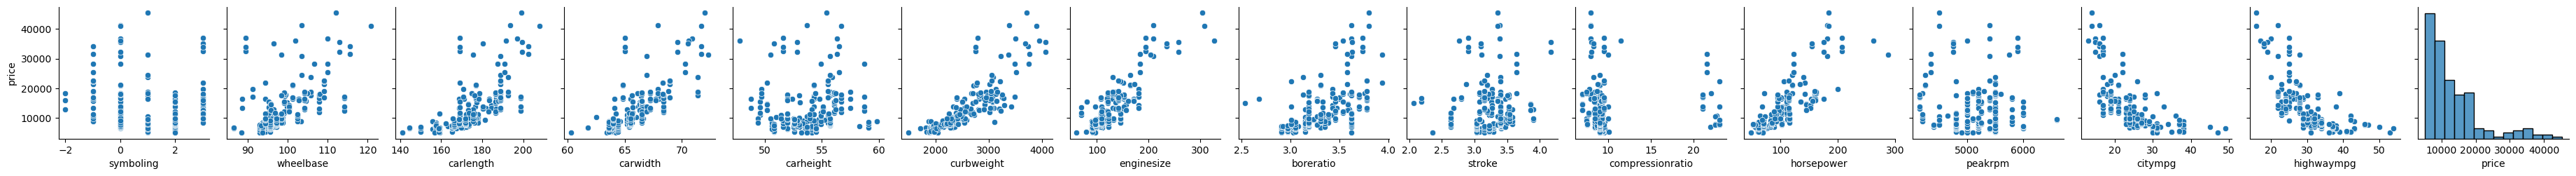

In [412]:
sns.pairplot(data.drop("car_ID").to_pandas(),y_vars=["price"])
plt.show()

Missing Values

In [413]:
data.null_count()

car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


No missing

In [414]:
cat_cols=[col for col in data.columns if data[col].dtype== pl.String]
num_cols=[col for col in data.drop("car_ID","price").columns if data[col].dtype!= pl.String]

# Avoiding data leakages

In [415]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop("price"),data[["car_ID","price"]],test_size=0.25,random_state=42,stratify=data[['aspiration']])

In [416]:
train_data=X_train.join(y_train,on="car_ID")
test_data=X_test.join(y_test,on="car_ID")
train_data.shape,test_data.shape

((153, 25), (52, 25))

# Categorical EDA

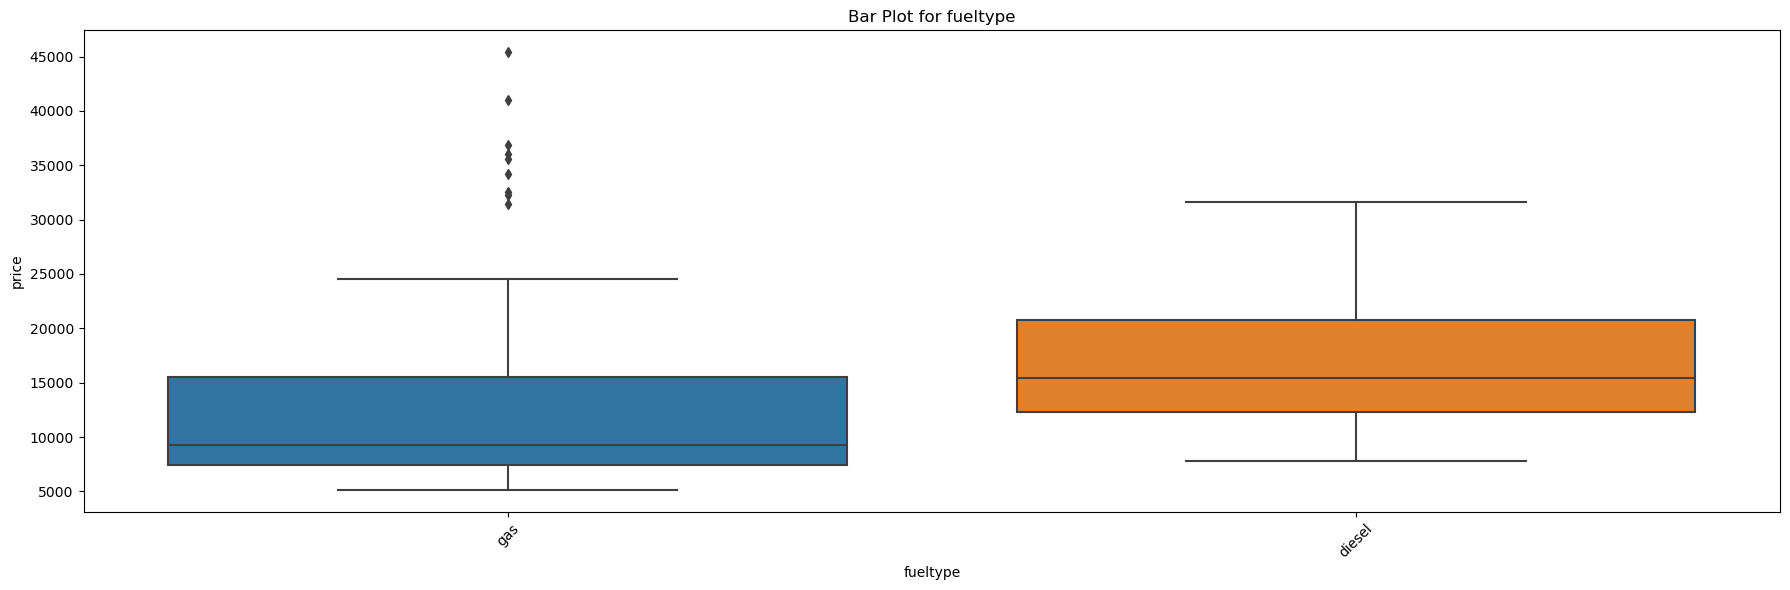

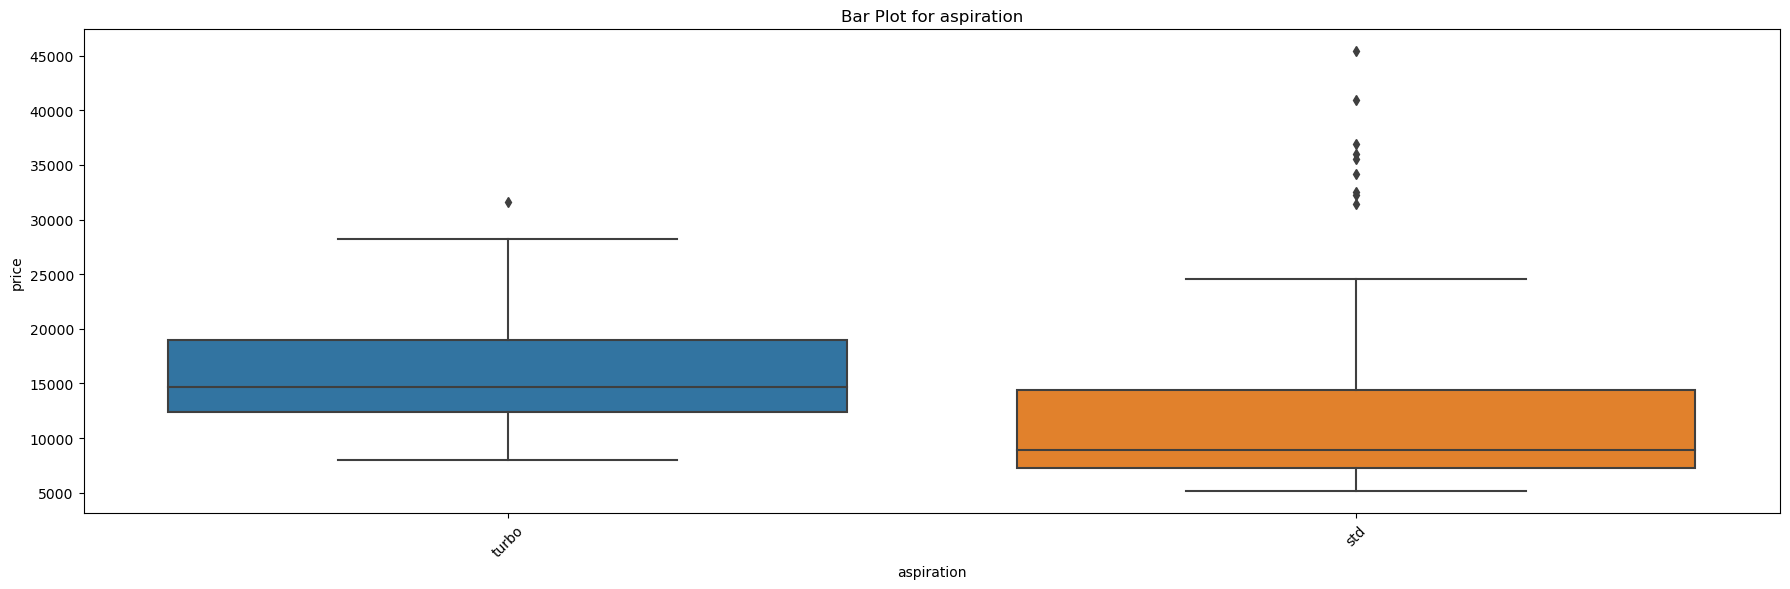

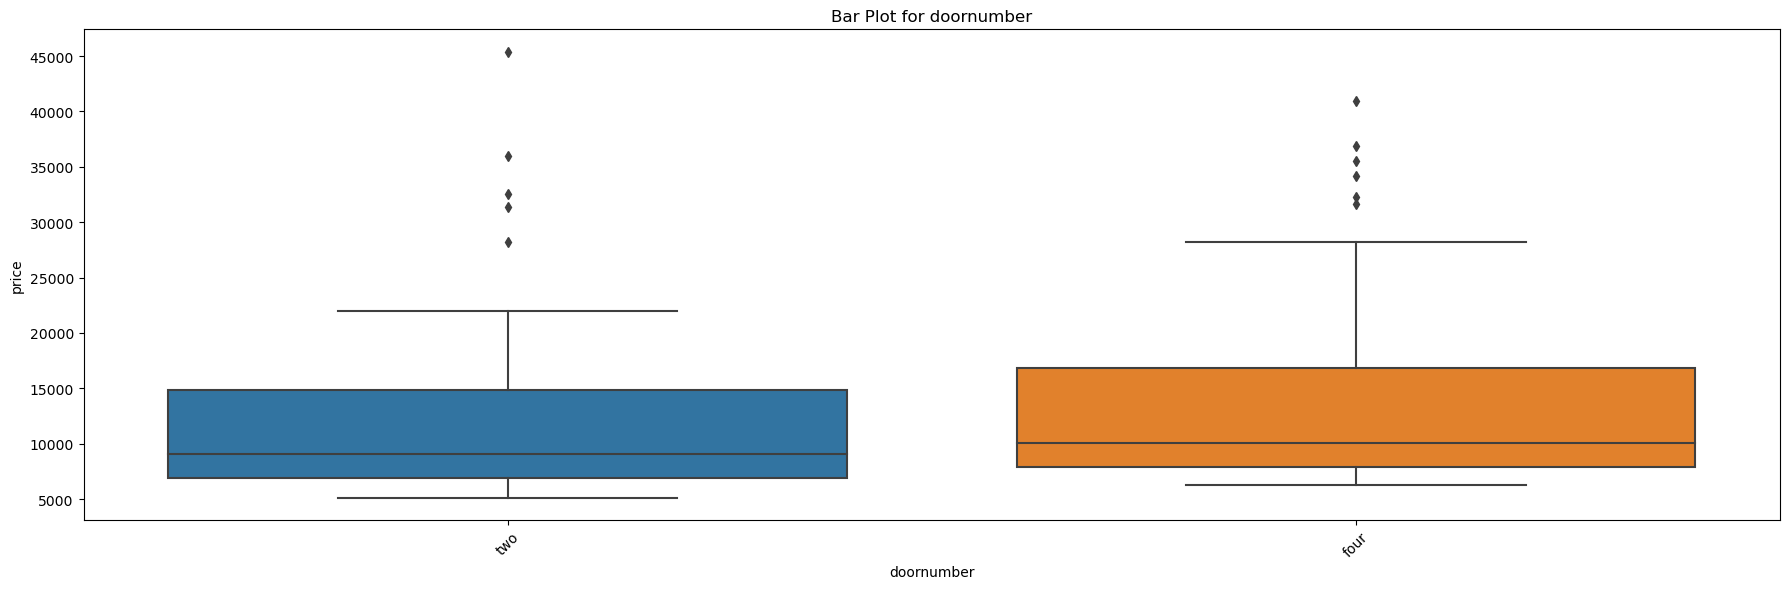

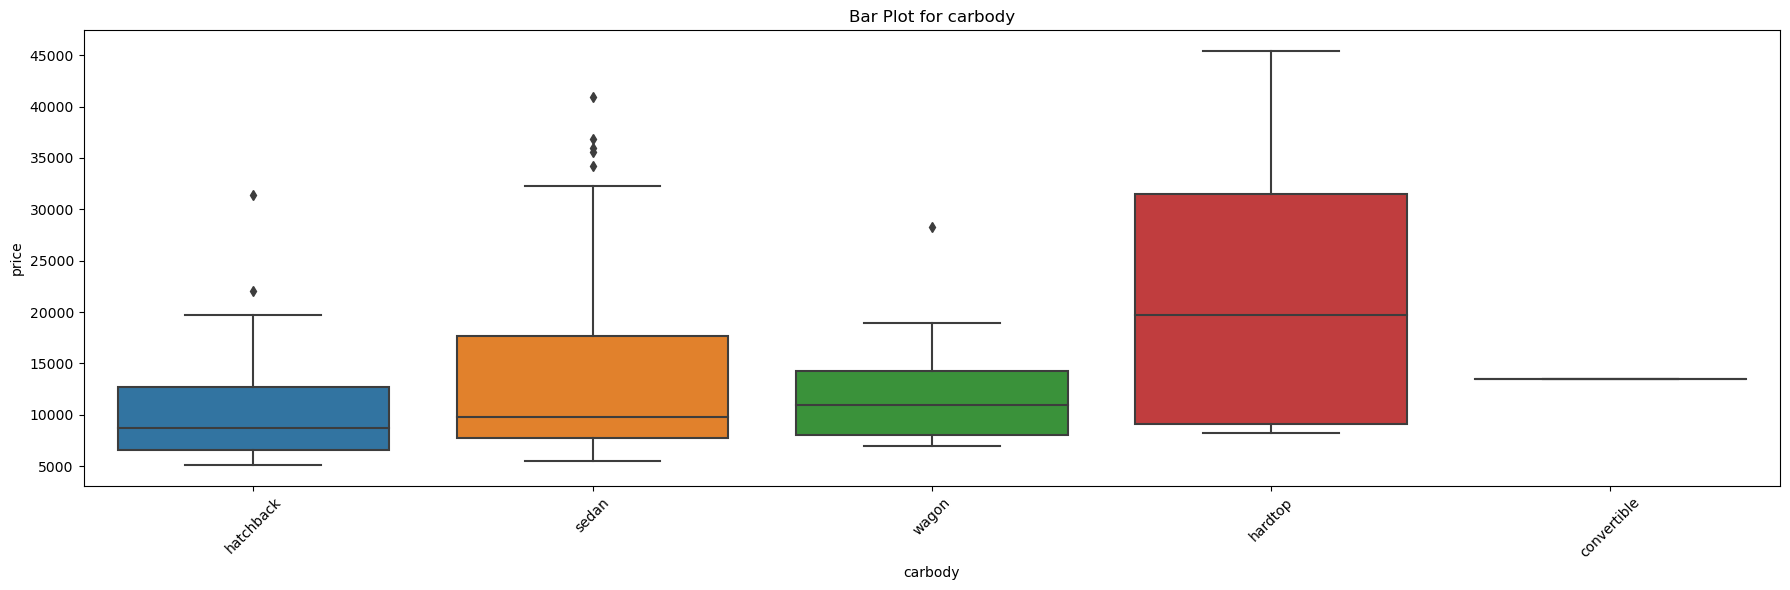

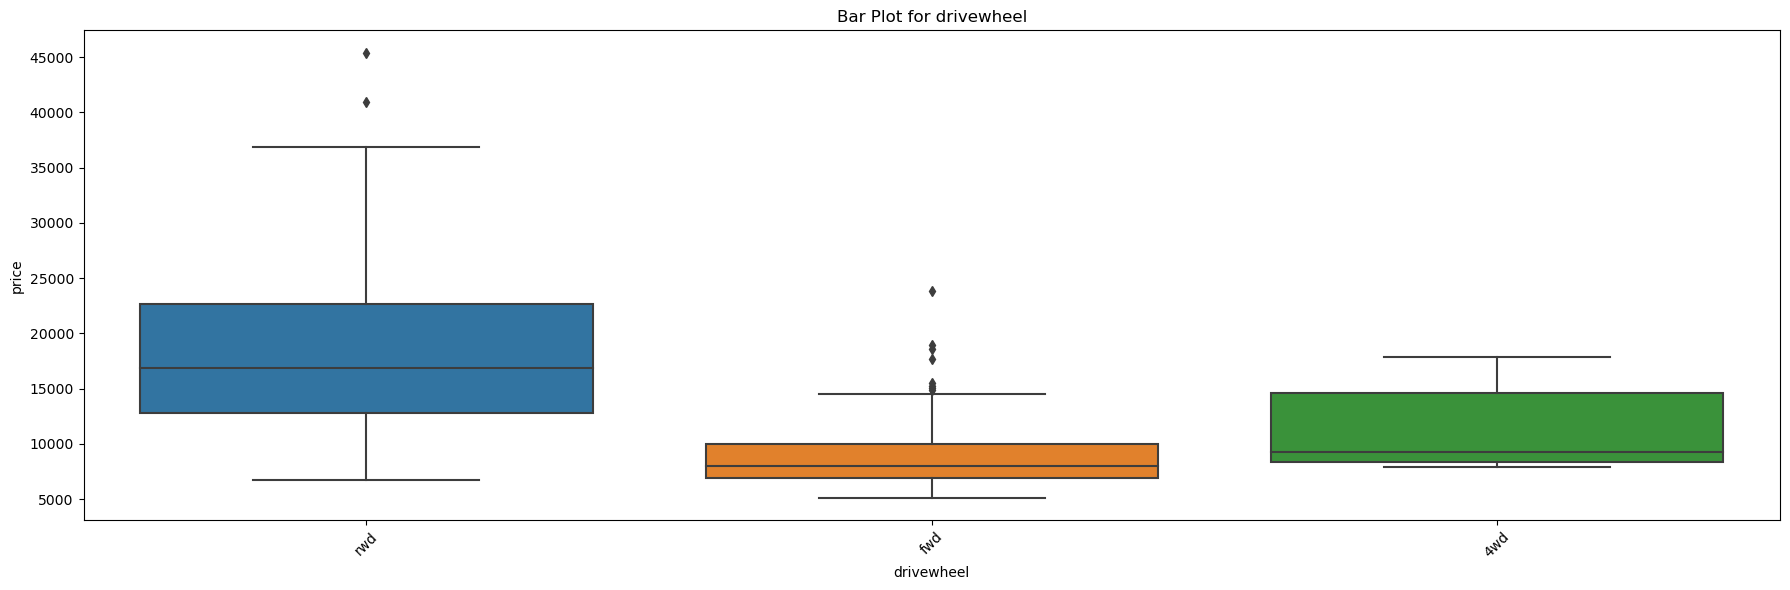

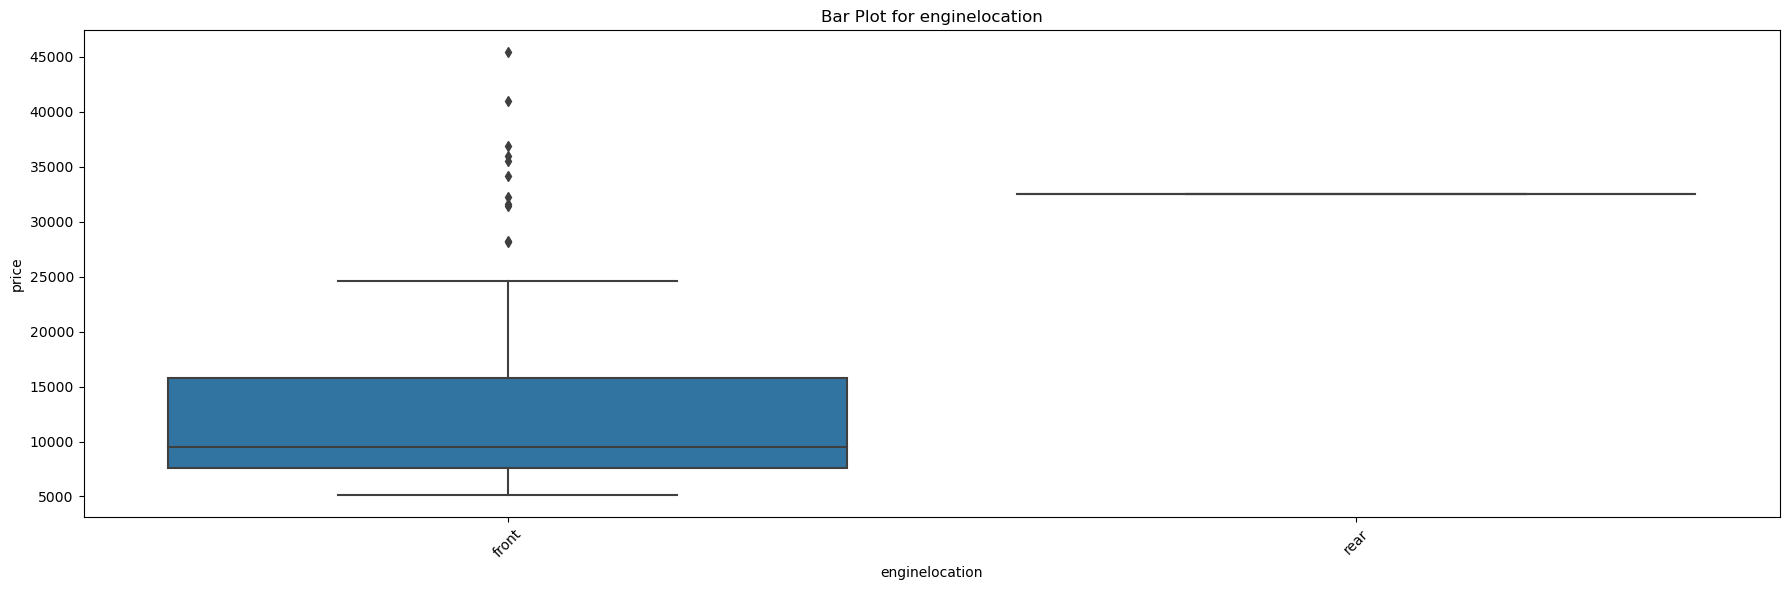

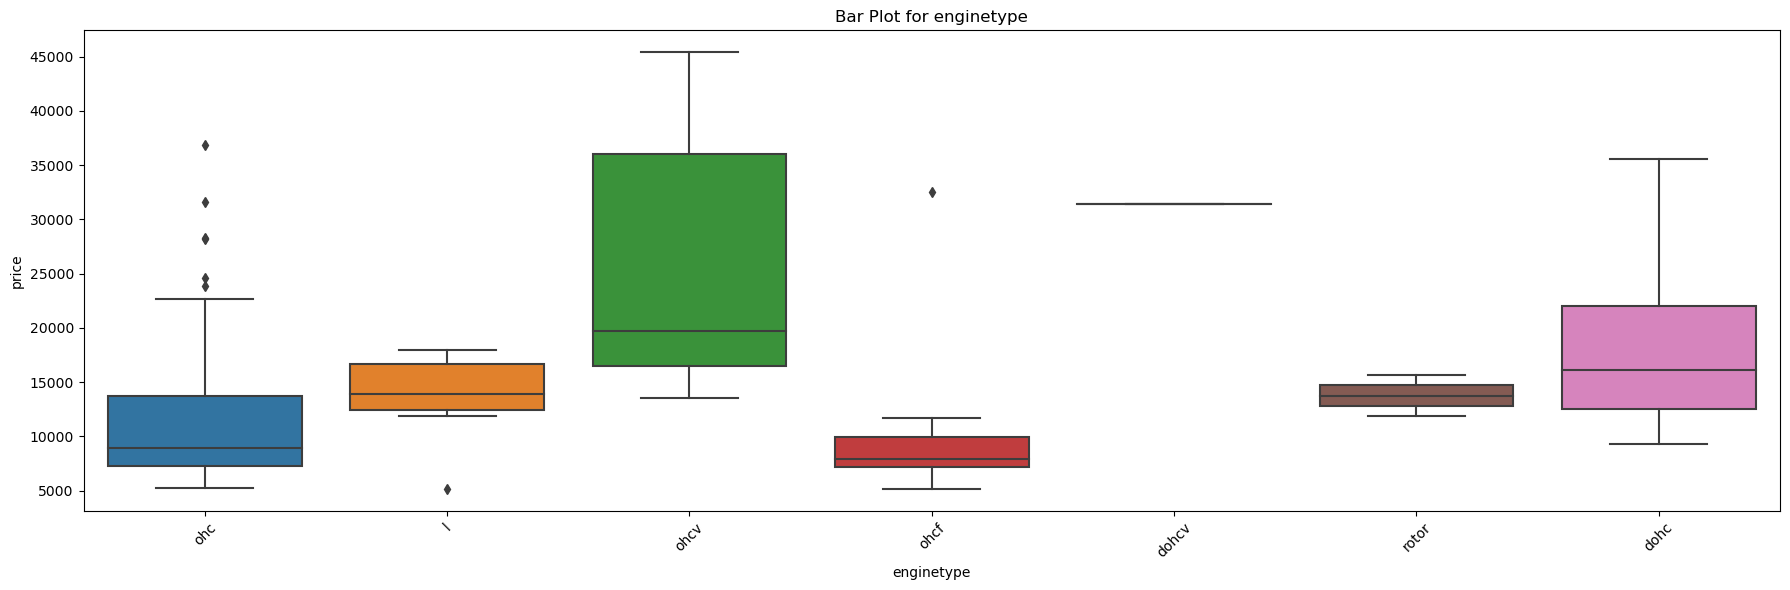

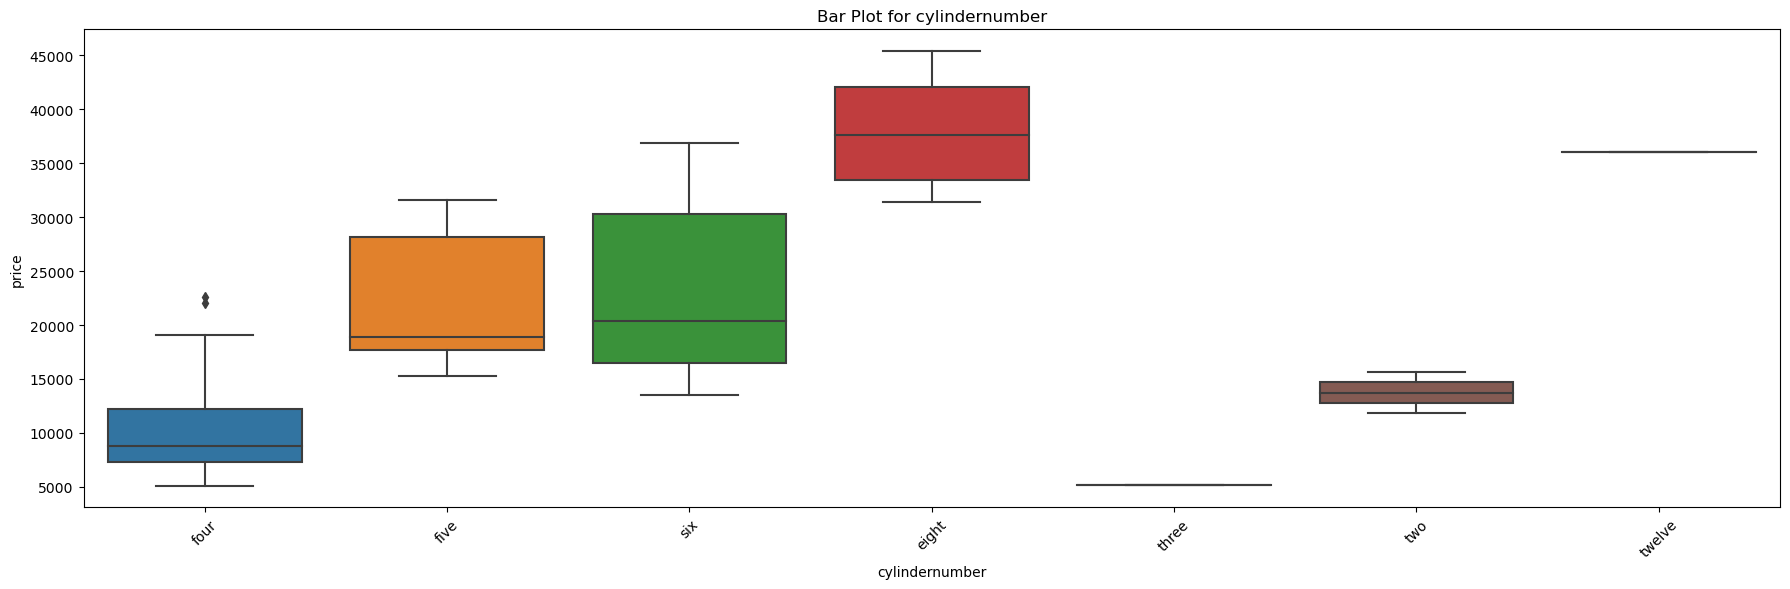

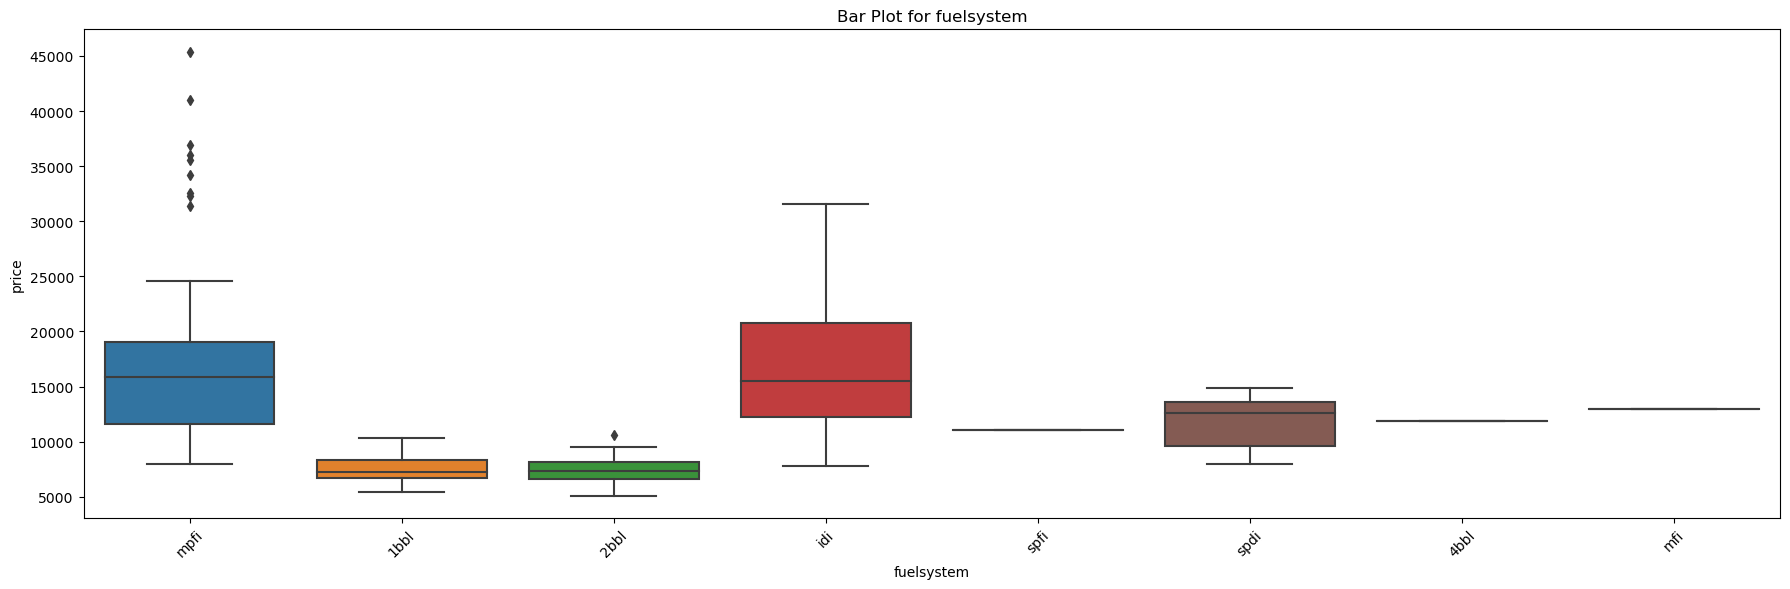

In [417]:
categorical_box_plot(train_data.to_pandas(),cat_cols,"price")

Dropping enginelocation since only 1 category present, Very few outliers present feature wise

In [418]:
train_data=train_data.drop("enginelocation")
test_data=test_data.drop("enginelocation")
cat_cols.remove("enginelocation")

indepedent t test for binary categories

In [419]:
perform_ttest(train_data, "fueltype", "gas", "diesel","price",alpha=0.05)
perform_ttest(train_data, "aspiration", "std", "turbo","price",alpha=0.05)
perform_ttest(train_data, "doornumber", "two", "four","price",alpha=0.05)

T-statistic: -1.987155926847422
P-value: 0.06880261549174588
There is no significant difference in price between gas and diesel for column 'fueltype'.
T-statistic: -2.9595236676030776
P-value: 0.004755576490977658
There is a significant difference in price between std and turbo for column 'aspiration'.
T-statistic: -1.049709198125396
P-value: 0.2957221492272472
There is no significant difference in price between two and four for column 'doornumber'.


Dropping fueltype,aspiration, doornumber

In [420]:
train_data=train_data.drop("fueltype")
train_data=train_data.drop("doornumber")
test_data=test_data.drop("fueltype")
test_data=test_data.drop("doornumber")
cat_cols.remove("fueltype")
cat_cols.remove("doornumber")

Performing Kruskal-Walli test instead of ANOVA as data not following normal distribution

In [421]:
perform_non_normal_kruskal_hypothesis(train_data,cat_cols,"price",alpha=0.05)

Kruskal-Wallis H-statistic: 16.774042995764688
P-value: 4.2105342147734885e-05
There is a significant difference in price between different aspiration categories.
Kruskal-Wallis H-statistic: 11.319734152274474
P-value: 0.023196182753789686
There is a significant difference in price between different carbody categories.
Kruskal-Wallis H-statistic: 64.39112884793873
P-value: 1.0414634400635607e-14
There is a significant difference in price between different drivewheel categories.
Kruskal-Wallis H-statistic: 30.243774757709485
P-value: 3.532785162358699e-05
There is a significant difference in price between different enginetype categories.
Kruskal-Wallis H-statistic: 61.7621853652638
P-value: 1.972310687364103e-11
There is a significant difference in price between different cylindernumber categories.
Kruskal-Wallis H-statistic: 100.5548851859548
P-value: 8.285817737658513e-19
There is a significant difference in price between different fuelsystem categories.


Significant enough to reject NULL Hypothesis of No impact of change to dependent variable

In [422]:
for i in cat_cols:
    print(data[i].value_counts())

shape: (2, 2)
┌────────────┬───────┐
│ aspiration ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ std        ┆ 168   │
│ turbo      ┆ 37    │
└────────────┴───────┘
shape: (5, 2)
┌─────────────┬───────┐
│ carbody     ┆ count │
│ ---         ┆ ---   │
│ str         ┆ u32   │
╞═════════════╪═══════╡
│ convertible ┆ 6     │
│ hardtop     ┆ 8     │
│ sedan       ┆ 96    │
│ wagon       ┆ 25    │
│ hatchback   ┆ 70    │
└─────────────┴───────┘
shape: (3, 2)
┌────────────┬───────┐
│ drivewheel ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ rwd        ┆ 76    │
│ 4wd        ┆ 9     │
│ fwd        ┆ 120   │
└────────────┴───────┘
shape: (7, 2)
┌────────────┬───────┐
│ enginetype ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ ohcv       ┆ 13    │
│ dohcv      ┆ 1     │
│ ohc        ┆ 148   │
│ dohc       ┆ 12    │
│ rotor      ┆ 4     │
│ ohcf       ┆ 15    │
│ l          ┆ 12    │
└────────────

Many columns with less value counts

# Manual encoding from insights (some insights are from powerbi reports)

In [423]:
train_data=train_data.with_columns(train_data["drivewheel"].str.replace_many(["4wd"],["fwd"]))
train_data=train_data.with_columns(train_data["drivewheel"].is_in(["rwd"]).cast(pl.Int64))
train_data=train_data.filter(train_data["cylindernumber"]!="three")
train_data=train_data.filter(train_data["cylindernumber"]!="twelve")
train_data=train_data.with_columns(train_data["cylindernumber"].str.replace_many(["four","two","five","six","eight"],["2","4","5","6","8"]).cast(pl.Int64))
test_data=test_data.with_columns(test_data["drivewheel"].str.replace_many(["4wd"],["fwd"]))
test_data=test_data.with_columns(test_data["drivewheel"].is_in(["rwd"]).cast(pl.Int64))
test_data=test_data.filter(test_data["cylindernumber"]!="three")
test_data=test_data.filter(test_data["cylindernumber"]!="twelve")
test_data=test_data.with_columns(test_data["cylindernumber"].str.replace_many(["four","two","five","six","eight"],["2","4","5","6","8"]).cast(pl.Int64))
cat_cols.remove("drivewheel")
cat_cols.remove("cylindernumber")
num_cols.append("drivewheel")
num_cols.append("cylindernumber")

# Numerical eda

In [424]:
train_data[num_cols]

symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,drivewheel,cylindernumber
i64,f64,f64,f64,f64,i64,i64,f64,f64,f64,i64,i64,i64,i64,i64,i64
1,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,175,5000,19,24,1,2
0,96.5,175.4,62.5,54.1,2372,110,3.15,3.58,9.0,86,5800,27,33,0,2
0,107.9,186.7,68.4,56.7,3075,120,3.46,3.19,8.4,97,5000,19,24,1,2
0,104.9,175.0,66.1,54.4,2670,140,3.76,3.16,8.0,120,5000,19,27,1,2
0,95.7,166.3,64.4,52.8,2109,98,3.19,3.03,9.0,70,4800,30,37,0,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,107.9,186.7,68.4,56.7,3197,152,3.7,3.52,21.0,95,4150,28,33,1,2
3,96.3,173.0,65.4,49.4,2370,110,3.17,3.46,7.5,116,5500,23,30,0,2
1,94.5,168.7,64.0,52.6,2169,98,3.19,3.03,9.0,70,4800,29,34,1,2


Univariate Analysis

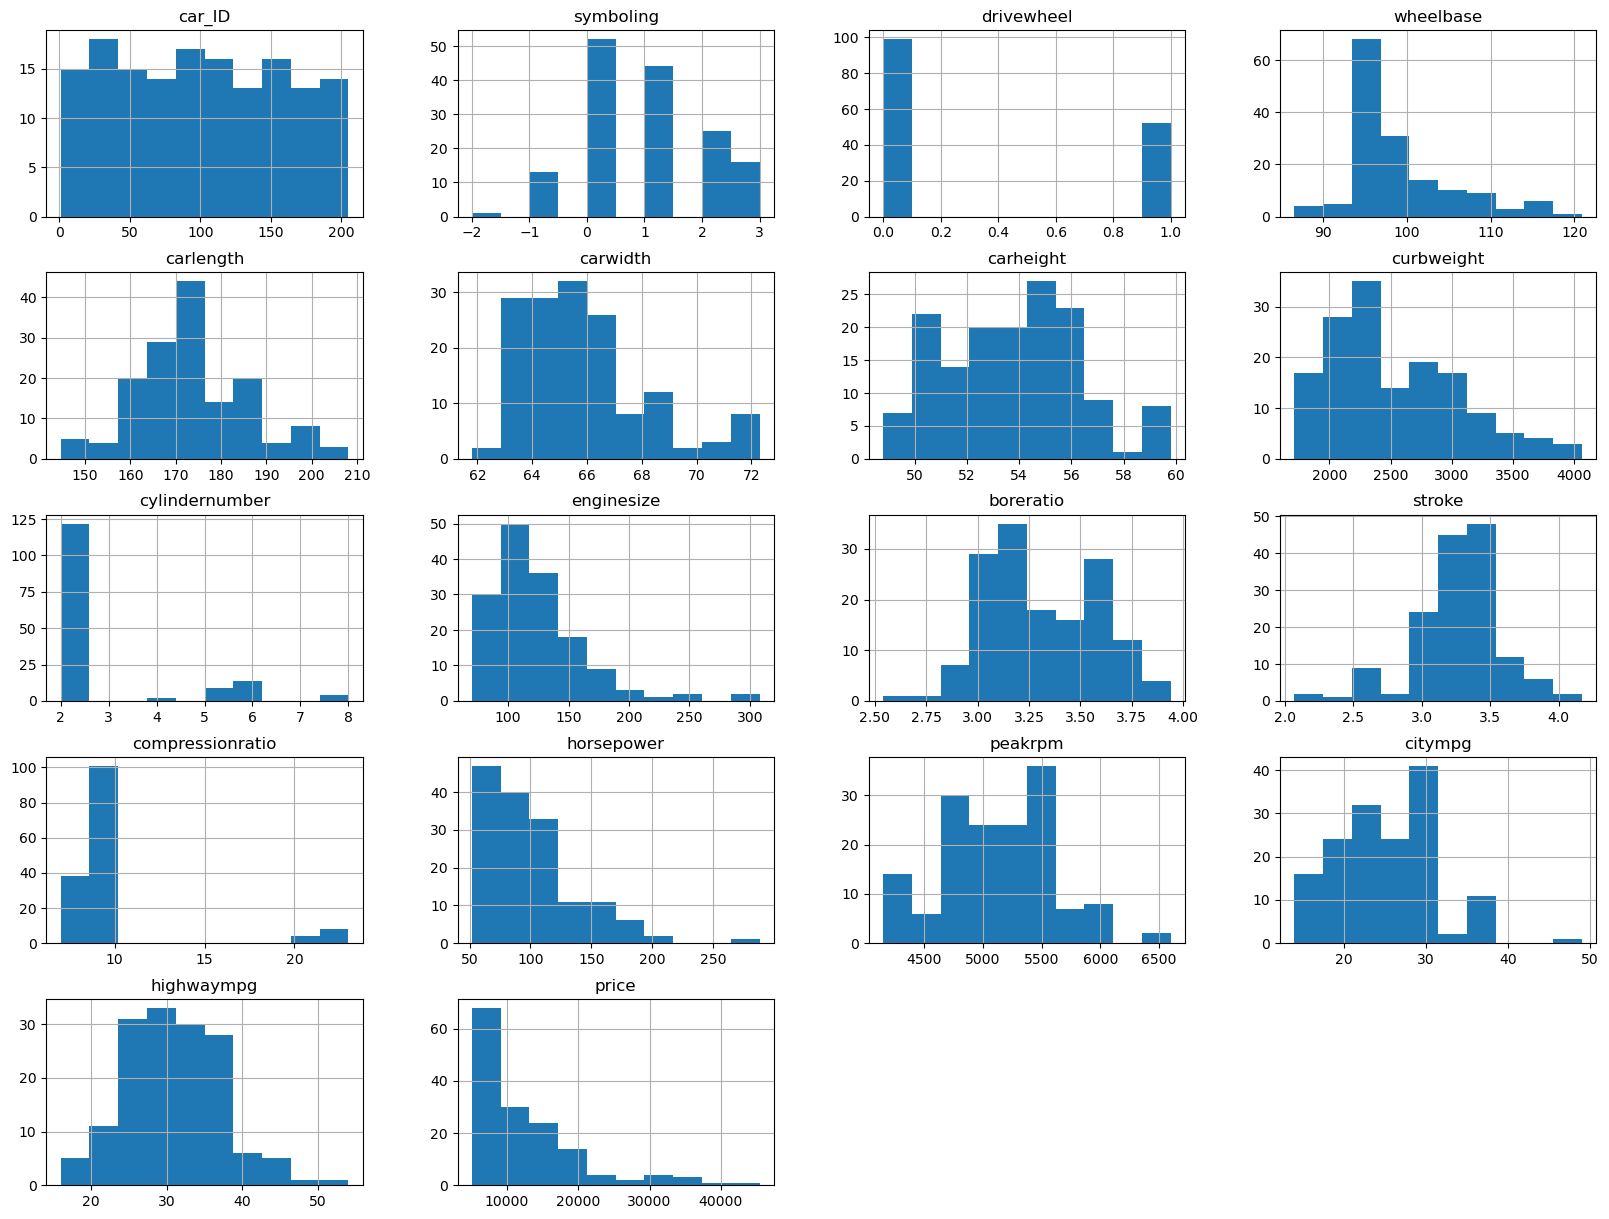

In [425]:
train_data.to_pandas().hist(bins=10,figsize=(20,15))
plt.show()

# Most features are roughly Normal, some are Right skewed including the dependent variable "Price"

Bivariate Analysis

<Axes: >

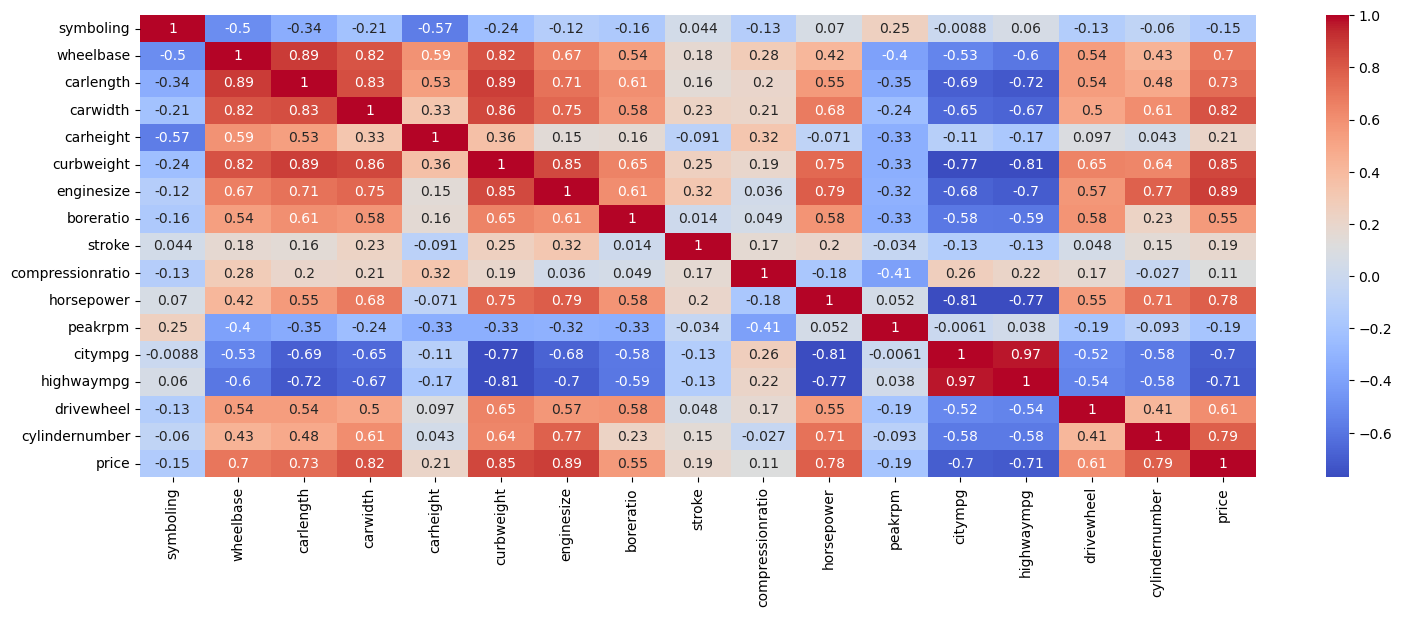

In [426]:
plt.figure(figsize=(18,6))
sns.heatmap(train_data[num_cols+["price"]].to_pandas().corr(),annot=True,cmap="coolwarm",robust=True)

# Lot of Multi collinear features exists

Will deal with these multi collinear features based on modeling results

In [427]:
train_data.write_csv("../Day2_naive_modeling/train_preprocessed.csv")
test_data.write_csv("../Day2_naive_modeling/test_preprocessed.csv")
train_data.write_csv("../Day3_featureEngineering/train_preprocessed.csv")
test_data.write_csv("../Day3_featureEngineering/test_preprocessed.csv")

# Building pipeline

In [428]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler


imputer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='infrequent_if_exist',drop='first',min_frequency=8), cat_cols),
    ('num', StandardScaler(), num_cols)
],remainder="passthrough")
pipe = Pipeline(steps=[
    ('imputer', imputer),
    ("lr",LinearRegression())
])
pipe

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                min_frequency=8),
                                                  ['aspiration', 'carbody',
                                                   'enginetype',
                                                   'fuelsystem']),
                                                 ('num', StandardScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'carheight', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg',
                                                   'drivewheel',
                                                   'cylindernumber'])])),
                ('lr', LinearRegression())])

Rough estimation of our linear regression model

Test Scores: [0.82367589 0.7656969  0.82313974 0.78045114 0.8412055 ]
Training Scores: [0.92980136 0.92698206 0.92714627 0.92461258 0.92218586]
Mean Test Score: 0.8068338338349073
Standard Deviation of Test Scores: 0.028702761646904197
Mean absolute Error: 3364.394783901557
R-squared: 0.6572149193205654


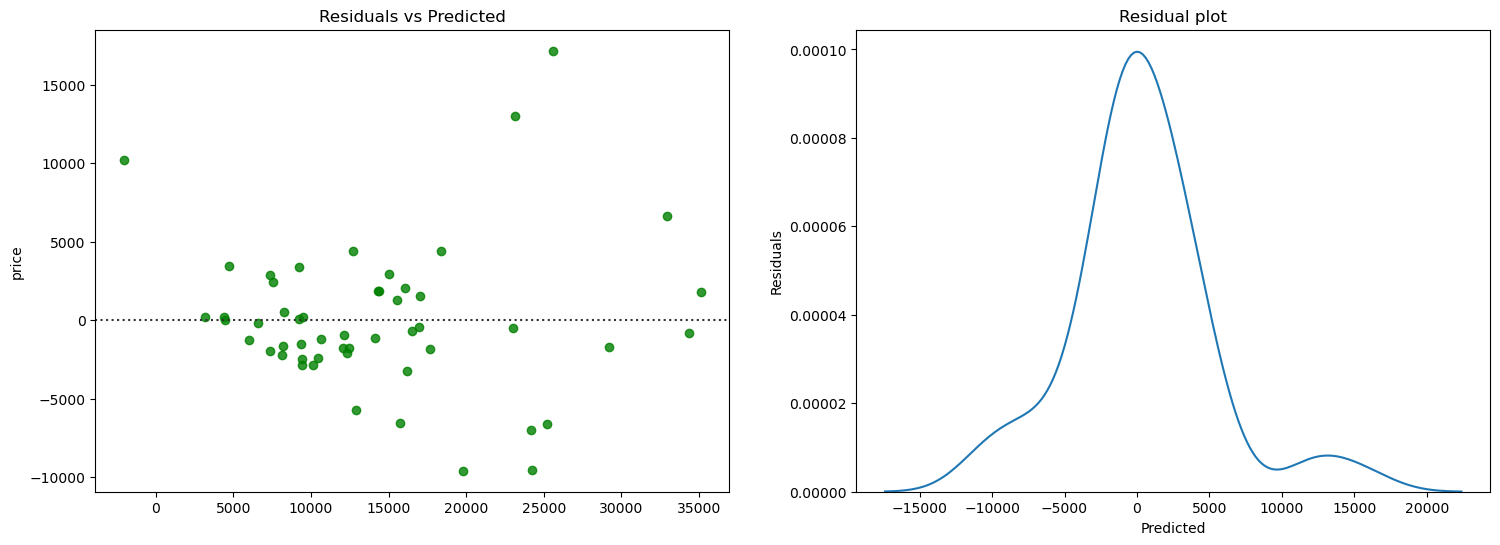

In [429]:
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error,r2_score

train_df = train_data.to_pandas()
test_df = test_data.to_pandas()
X_train, X_test, y_train, y_test = train_df.drop(["price","car_ID"],axis=1),test_df.drop(["price","car_ID"],axis=1),train_df['price'],test_df['price']

kf=KFold(n_splits=5)
cv_results = cross_validate(pipe, X_train,y_train, cv=kf, scoring='r2', return_train_score=True)
print(f'Test Scores: {cv_results["test_score"]}')
print(f'Training Scores: {cv_results["train_score"]}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')

predictions = cross_val_predict(pipe, X_test, y_test, cv=kf)
residuals = y_test - predictions
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_true=y_test,y_pred= predictions)

print(f'Mean absolute Error: {mae}')
print(f'R-squared: {r2}')

fig,[ax1,ax2] = plt.subplots(ncols=2,figsize=(18,6))
sns.residplot(x=predictions, y=residuals, color='g',ax=ax1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(residuals,ax=ax2)
ax2.set_title("Residual plot")
plt.show()

# Starting mean absoulte error 3364, R2 score 65% on holdout, Mean test score 80% with 2% deviation

# insights : over fitting to train data and performing poor on test

Mean Absolute Error (Original Scale): 3364.394783901557
R-squared (Original Scale): 0.6572149193205654


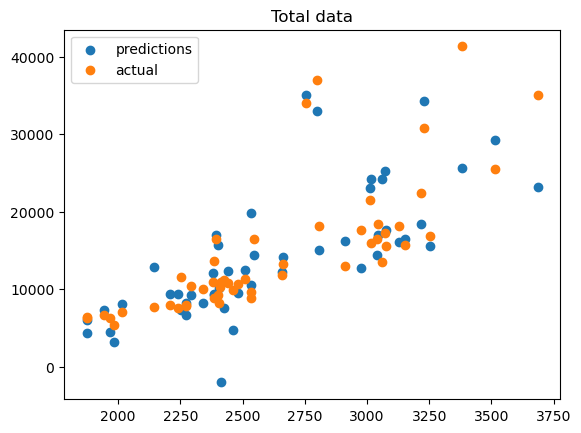

In [430]:
print(f'Mean Absolute Error (Original Scale): {mae}')
print(f'R-squared (Original Scale): {r2}')
plt.scatter(X_test["curbweight"],predictions)
plt.scatter(X_test["curbweight"],y_test)
plt.title("Total data")
plt.legend(["predictions", "actual"])
plt.show()